In [103]:
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import pandas as pd
import numpy as np


In [104]:
df=pd.read_csv('./train.csv')
df_test=pd.read_csv('./test.csv')


df_test_id=df_test['Id']

In [105]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
#select the numeric columns
df_numeric=df.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values

df_test_numeric=df_test.select_dtypes(include=[np.number])
numeric_cols_test=df_test_numeric.columns.values



#select the non numeric cols
df_non_numeric=df.select_dtypes(exclude=[np.number])
non_numeric_cols=df_non_numeric.columns.values

df_test_non_numeric=df_test.select_dtypes(exclude=[np.number])
non_numeric_cols_test=df_test_non_numeric.columns.values

In [108]:
np.isnan(df_numeric).sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [109]:
df_numeric['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [110]:
#Trying imputing

#filling the nan values with the mean of the rest values
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="mean")




In [111]:
imputer.fit(df_numeric.drop(['SalePrice'],axis=1))
trans_df_num=imputer.transform(df_numeric.drop(['SalePrice'],axis=1))

In [112]:
imputer.fit(df_test_numeric)
trans_df_num_test=imputer.transform(df_test_numeric)

In [113]:
np.isnan(trans_df_num).sum()

0

In [114]:
df['MSZoning'].unique()

#will come back to this later


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [115]:
#NORMALISING DATASET
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()

trans_df_num_norm=trans.fit_transform(trans_df_num)
trans_df_num_norm_test=trans.fit_transform(trans_df_num_test)

In [116]:
trans_df_num_norm[0:3]

array([[0.00000000e+00, 2.35294118e-01, 1.50684932e-01, 3.34198042e-02,
        6.66666667e-01, 5.00000000e-01, 9.49275362e-01, 8.83333333e-01,
        1.22500000e-01, 1.25088590e-01, 0.00000000e+00, 6.42123288e-02,
        1.40098200e-01, 1.19779715e-01, 4.13559322e-01, 0.00000000e+00,
        2.59231349e-01, 3.33333333e-01, 0.00000000e+00, 6.66666667e-01,
        5.00000000e-01, 3.75000000e-01, 3.33333333e-01, 5.00000000e-01,
        0.00000000e+00, 9.36363636e-01, 5.00000000e-01, 3.86459803e-01,
        0.00000000e+00, 1.11517367e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.09090909e-02,
        5.00000000e-01],
       [6.85400960e-04, 0.00000000e+00, 2.02054795e-01, 3.87950174e-02,
        5.55555556e-01, 8.75000000e-01, 7.53623188e-01, 4.33333333e-01,
        0.00000000e+00, 1.73281361e-01, 0.00000000e+00, 1.21575342e-01,
        2.06546645e-01, 2.12941716e-01, 0.00000000e+00, 0.00000000e+00,
        1.74830445e-01, 0.00000000e+00,

In [117]:
#FEATURE SELECTION

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable

The scikit-learn Python machine learning library provides an implementation of RFE for machine learning. RFE is a transform. To use it, first, the class is configured with the chosen algorithm specified via the estimator argument and the number of features to select via the n_features_to_select argument.

In [118]:

Y=df_numeric['SalePrice']

In [119]:
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=36)
rfe.fit(trans_df_num_norm,Y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=36)

In [120]:
#summarize all features
for i in range(trans_df_num.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1
Column: 13, Selected=True, Rank: 1
Column: 14, Selected=True, Rank: 1
Column: 15, Selected=True, Rank: 1
Column: 16, Selected=True, Rank: 1
Column: 17, Selected=True, Rank: 1
Column: 18, Selected=True, Rank: 1
Column: 19, Selected=True, Rank: 1
Column: 20, Selected=True, Rank: 1
Column: 21, Selected=True, Rank: 1
Column: 22, Selected=True, Rank: 1
Column: 23, Selected=True, Rank: 1
Column: 24, Selected=True, Rank: 1
Column: 25, Selected=True, Rank: 1
Column: 26, Selected=True, Rank: 1
Column: 27, Selected=True, Rank: 1
Column: 28, Selected=True, Ran

In [121]:
selected_indices=[]
for i in range(trans_df_num_norm.shape[1]):
    if rfe.support_[i]==True:
        selected_indices.append(i)


selected_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36]

In [122]:
#after RFE

X_norm_rfe=trans_df_num_norm[:,selected_indices]

X_norm_rfe_test=trans_df_num_norm_test[:,selected_indices]



In [123]:
#ONE HOT ENCODING

#implementing one hold encoding for non numeric data

from sklearn.preprocessing import OneHotEncoder

In [124]:
df_non_numeric.shape

(1460, 43)

In [125]:
df_non_numeric.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

PoolQC           1453
Fence            1179
MiscFeature      1406
Alley            1369

In [126]:
#dropping coloumns with large nan values

In [127]:
df_non_numeric=df_non_numeric.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)
df_test_non_numeric=df_test_non_numeric.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [128]:
#imputing some values
imputer=SimpleImputer(strategy='most_frequent')

imputer.fit(df_non_numeric)
trans_df_non_num=imputer.transform(df_non_numeric)

In [129]:
imputer.fit(df_test_non_numeric)
trans_df_non_num_test=imputer.transform(df_test_non_numeric)

In [130]:
encoder=OneHotEncoder(sparse=False)
X_oe=encoder.fit_transform(trans_df_non_num)
X_oe_test=encoder.fit_transform(trans_df_non_num_test)

rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=15)
rfe.fit(X_oe,Y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=15)

In [131]:
X_oe.shape[1]

239

In [132]:
selected_indices=[]
for i in range(X_oe.shape[1]):
    if rfe.support_[i]==True:
        selected_indices.append(i)


selected_indices

[10, 40, 67, 74, 81, 122, 130, 132, 144, 153, 186, 188, 199, 208, 210]

In [133]:
X_non_numeric=X_oe[:,selected_indices]
X_non_numeric_test=X_oe_test[:,selected_indices]

In [134]:
X=np.concatenate([X_norm_rfe,X_non_numeric],axis=1)
test_X=np.concatenate([X_norm_rfe_test,X_non_numeric_test],axis=1)

In [135]:
test_X.shape

(1459, 51)

In [136]:
X.shape

(1460, 51)

In [137]:
Y.shape

(1460,)

In [138]:
#preprocessing done

In [139]:
#XGBOOST
from xgboost import XGBRegressor

You can specify hyperparameter values to the class constructor to configure the model.

Perhaps the most commonly configured hyperparameters are the following:

- n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.

- max_depth: The maximum depth of each tree, often values are between 1 and 10.

- eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

- subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

- colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [140]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


In [141]:
#eval model
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

#define model eval method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# #eval model
# scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# scores=np.absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [142]:
X.shape


(1460, 51)

In [143]:
#divide into test train and validation
X_train=X[:800,:]
X_test=X[800:1200,:]
X_val=X[1200:,:]


In [145]:
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [146]:
Y_test=model.predict(X_test)

Y_test.size

400

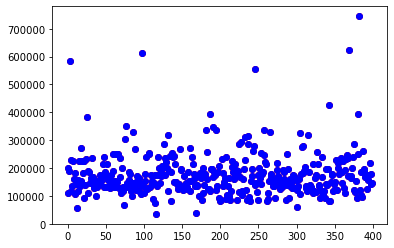

In [147]:
x_axis=[i for i in range(len(Y_test))]
plt.scatter(x_axis,Y[800:1200],color='red')
plt.scatter(x_axis,Y_test,color='blue')
plt.show()

In [148]:
test_Y=model.predict(test_X)

In [149]:
test_Y

array([141044.66, 169097.58, 179177.4 , ..., 182658.73, 120405.15,
       243217.64], dtype=float32)

In [150]:
sales=pd.DataFrame(test_Y,columns=['SalePrice'])

In [151]:
sales

,SalePrice
0,141044.656250
1,169097.578125
2,179177.406250
3,202018.234375
4,201257.343750
...,...
1454,75831.976562
1455,76611.835938
1456,182658.734375
1457,120405.148438


In [152]:
ans_df=pd.concat([df_test_id,sales],axis=1)

In [153]:
ans_df

,Id,SalePrice
0,1461,141044.656250
1,1462,169097.578125
2,1463,179177.406250
3,1464,202018.234375
4,1465,201257.343750
...,...,...
1454,2915,75831.976562
1455,2916,76611.835938
1456,2917,182658.734375
1457,2918,120405.148438


In [154]:
ans_df.to_csv('ans.csv',index=False)